<a href="https://colab.research.google.com/github/Ankit-Aakash/Data-Science/blob/main/Net_Promotor_Score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd

In [5]:
!gdown 1PQhT_-kTg1JhTKFq0U-5MzQ4gARu-V3a #load the dataset to Colab

Downloading...
From: https://drive.google.com/uc?id=1PQhT_-kTg1JhTKFq0U-5MzQ4gARu-V3a
To: /content/survey_large.txt
100% 21.8M/21.8M [00:00<00:00, 174MB/s]


In [6]:
scores = np.loadtxt('survey_large.txt',dtype = 'int') #import the text file into numpy
scores #Ratings given by the user

array([ 7, 10,  5, ...,  9,  5,  9])

In [9]:
scores.mean() #This includes neutrals also which is not required in computation of Net Promotor Score

7.250214

In [10]:
#Calculate detractors
detractors = scores [scores < 7]
#Calculate promotors
promotors = scores[scores > 8]

In [13]:
detractors.size

2844902

In [14]:
promotors.size

5218510

In [15]:
#Calculate NPS
nps = ((promotors.size - detractors.size) / scores.size)*100
nps

23.73608

In [16]:
!wget "https://drive.google.com/uc?export=download&id=1E3bwvYGf1ig32RmcYiWc0IXPN-mD_bI_" -O data.csv #Load data to collab

--2023-05-20 13:22:18--  https://drive.google.com/uc?export=download&id=1E3bwvYGf1ig32RmcYiWc0IXPN-mD_bI_
Resolving drive.google.com (drive.google.com)... 173.194.218.100, 173.194.218.102, 173.194.218.113, ...
Connecting to drive.google.com (drive.google.com)|173.194.218.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-68-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/7e6uf7ksq6hsck5krv0he2u43027ogb6/1684588875000/14302370361230157278/*/1E3bwvYGf1ig32RmcYiWc0IXPN-mD_bI_?e=download&uuid=21ebb902-85df-44fe-afa9-9505634dcd5d [following]
--2023-05-20 13:22:18--  https://doc-0s-68-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/7e6uf7ksq6hsck5krv0he2u43027ogb6/1684588875000/14302370361230157278/*/1E3bwvYGf1ig32RmcYiWc0IXPN-mD_bI_?e=download&uuid=21ebb902-85df-44fe-afa9-9505634dcd5d
Resolving doc-0s-68-docs.googleusercontent.com (doc-0s-68-docs.googleusercontent.com)... 74.125.134.132, 2

In [17]:
dataframe = pd.read_csv ('data.csv')

In [19]:
dataframe.shape #Rows,columns of dataframe

(1704, 6)

In [25]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     1704 non-null   object 
 1   year        1704 non-null   int64  
 2   population  1704 non-null   int64  
 3   continent   1704 non-null   object 
 4   life_exp    1704 non-null   float64
 5   gdp_cap     1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


In [26]:
dataframe.describe()

,year,population,life_exp,gdp_cap
count,1704.00000,1.704000e+03,1704.000000,1704.000000
mean,1979.50000,2.960121e+07,59.474439,7215.327081
std,17.26533,1.061579e+08,12.917107,9857.454543
min,1952.00000,6.001100e+04,23.599000,241.165876
25%,1965.75000,2.793664e+06,48.198000,1202.060309
50%,1979.50000,7.023596e+06,60.712500,3531.846988
75%,1993.25000,1.958522e+07,70.845500,9325.462346
max,2007.00000,1.318683e+09,82.603000,113523.132900


In [32]:
#Country with the least life expentency in 2007
datafor2007 = dataframe[dataframe['year'] == 2007]
datafor2007.describe()

,year,population,life_exp,gdp_cap
count,142.0,1.420000e+02,142.000000,142.000000
mean,2007.0,4.402122e+07,67.007423,11680.071820
std,0.0,1.476214e+08,12.073021,12859.937337
min,2007.0,1.995790e+05,39.613000,277.551859
25%,2007.0,4.508034e+06,57.160250,1624.842248
50%,2007.0,1.051753e+07,71.935500,6124.371108
75%,2007.0,3.121004e+07,76.413250,18008.835640
max,2007.0,1.318683e+09,82.603000,49357.190170


In [34]:
min_exp = datafor2007['life_exp'].min()
min_exp

39.613

In [35]:
countrywithlowestlifeexp = datafor2007[datafor2007['life_exp'] == min_exp]
countrywithlowestlifeexp

,country,year,population,continent,life_exp,gdp_cap
1463,Swaziland,2007,1133066,Africa,39.613,4513.480643


In [36]:
#Country with the highest GDP in 2007
countrywithhighestGDP = datafor2007[datafor2007['gdp_cap']==datafor2007['gdp_cap'].max()]
countrywithhighestGDP

,country,year,population,continent,life_exp,gdp_cap
1151,Norway,2007,4627926,Europe,80.196,49357.19017


In [37]:
#How GDP of India has grown
india = dataframe[dataframe['country']=='India']
india

,country,year,population,continent,life_exp,gdp_cap
696,India,1952,372000000,Asia,37.373,546.565749
697,India,1957,409000000,Asia,40.249,590.061996
698,India,1962,454000000,Asia,43.605,658.347151
699,India,1967,506000000,Asia,47.193,700.770611
700,India,1972,567000000,Asia,50.651,724.032527
701,India,1977,634000000,Asia,54.208,813.337323
702,India,1982,708000000,Asia,56.596,855.723538
703,India,1987,788000000,Asia,58.553,976.512676
704,India,1992,872000000,Asia,60.223,1164.406809
705,India,1997,959000000,Asia,61.765,1458.817442


In [40]:
yearandgdpdataforindia=india[['year','gdp_cap']]
yearandgdpdataforindia

,year,gdp_cap
696,1952,546.565749
697,1957,590.061996
698,1962,658.347151
699,1967,700.770611
700,1972,724.032527
701,1977,813.337323
702,1982,855.723538
703,1987,976.512676
704,1992,1164.406809
705,1997,1458.817442


<Axes: >

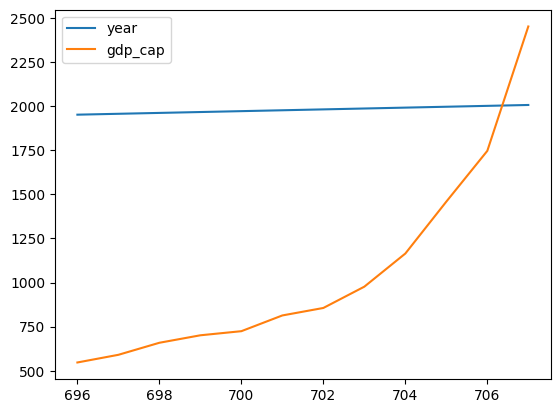

In [41]:
#Draw a graph using this number
yearandgdpdataforindia.plot()